In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data = pd.read_csv("housing.csv")
data.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [3]:
data.shape

(20640, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.describe() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
data['ocean_proximity'].nunique()

5

In [7]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [8]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

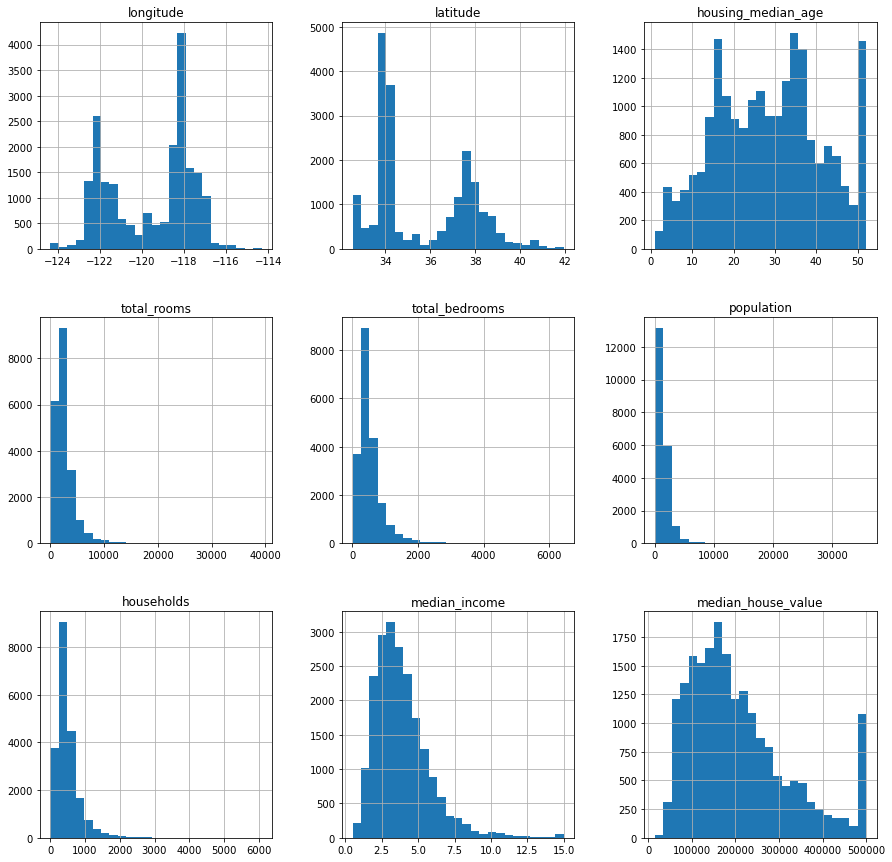

In [14]:
data.hist(bins=25, figsize=(15,15))
plt.show()

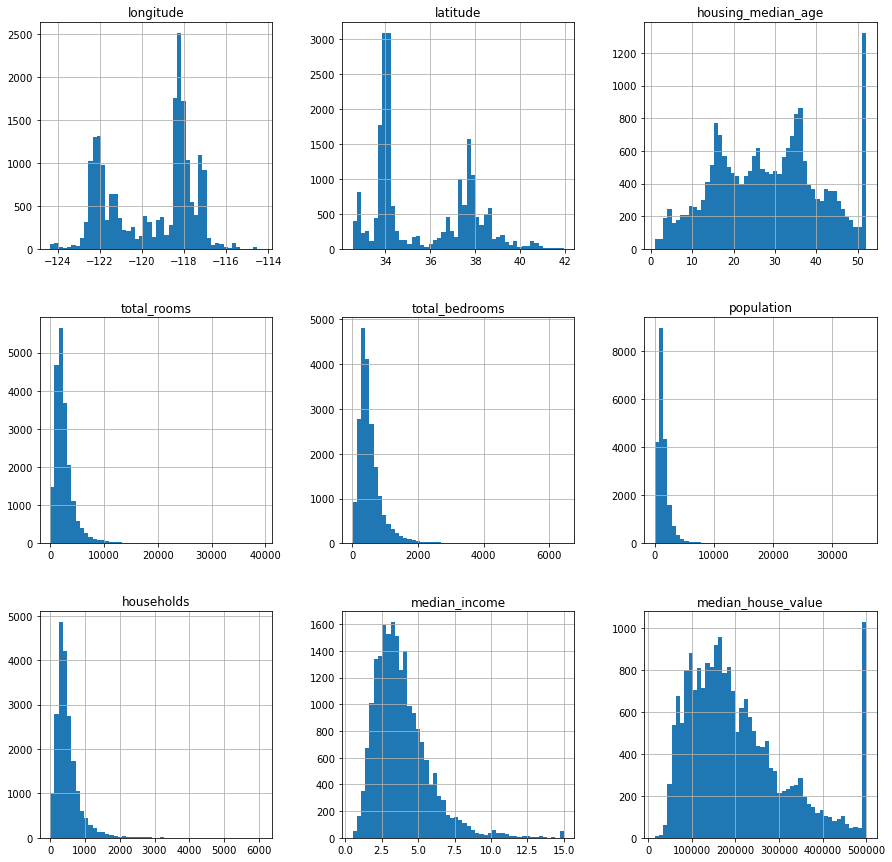

In [15]:
data.hist(bins=50, figsize=(15,15))
plt.show()

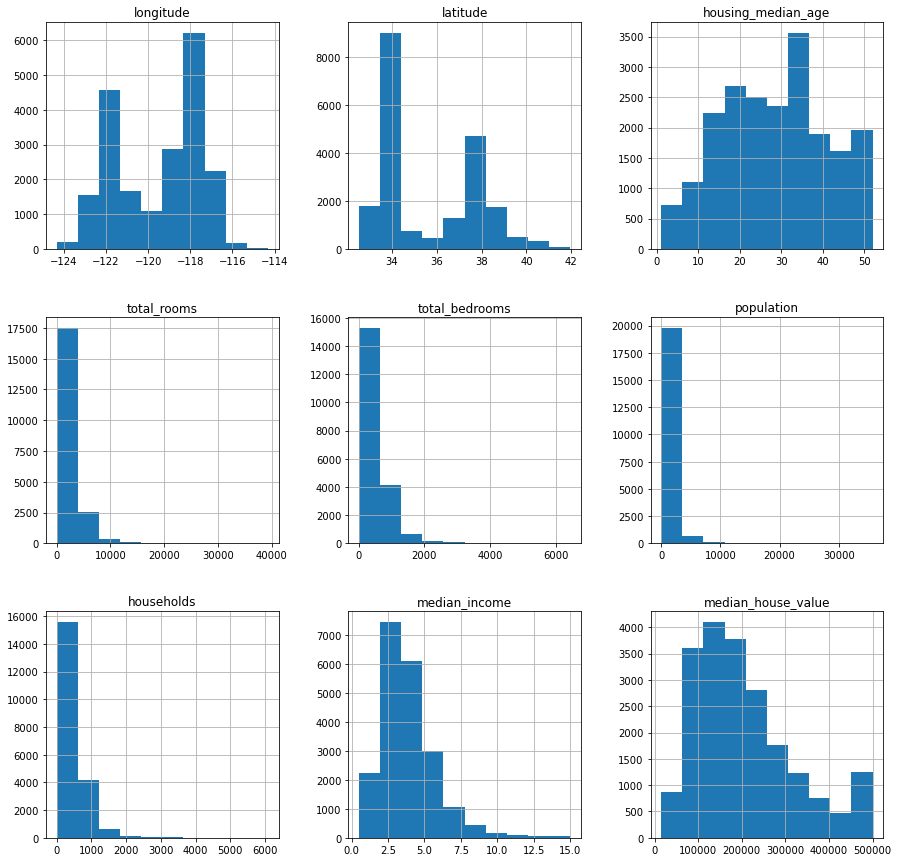

In [16]:
data.hist(figsize=(15,15))
plt.show()

<AxesSubplot:>

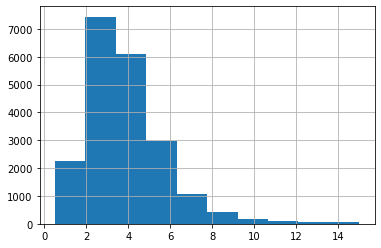

In [17]:
data["median_income"].hist()

In [ ]:
#limit income

In [6]:
data["income_category"]= np.ceil(data['median_income']/1.5)
#put values above 5th into 5th
data["income_category"].where(data['income_category']< 5,other=5.0, inplace = True )

In [7]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

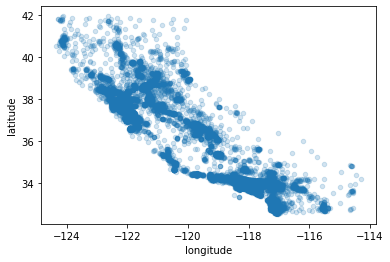

In [8]:
data.plot(kind="scatter", x = "longitude" , y = "latitude", alpha = 0.2)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

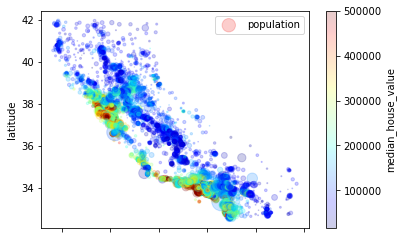

In [9]:
data.plot(kind="scatter", x = "longitude" , y = "latitude", alpha = 0.2, s= data["population"]/100 , label= "population", c = "median_house_value", cmap=plt.get_cmap("jet"))

In [10]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_category
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.010690
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,-0.085528
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.146920
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.220528
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.015662
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,0.025809
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,0.038490
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.902750
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.643892
income_category,-0.010690,-0.085528,-0.146920,0.220528,0.015662,0.025809,0.038490,0.902750,0.643892,1.000000


In [11]:
corr = data.corr()
corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_category       0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [13]:
housing = data.dropna(subset=["total_bedrooms"])

In [14]:
ocean=pd.get_dummies(housing["ocean_proximity"])

In [15]:
ocean.head(3)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0


In [16]:
housing_cat_ocean = pd.concat([housing,ocean],axis=1)

In [17]:
housing_cat_ocean.sample(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
13465,-117.37,34.13,12.0,1893.0,493.0,1054.0,389.0,2.3456,140800.0,INLAND,2.0,0,1,0,0,0
5245,-118.43,34.09,27.0,1613.0,200.0,497.0,197.0,7.9835,500001.0,<1H OCEAN,5.0,1,0,0,0,0


In [19]:
housing_clean = housing_cat_ocean.drop(["ocean_proximity","ISLAND", "income_category"],axis=1)

In [20]:
housing_clean.sample(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
19694,-121.62,39.12,26.0,1405.0,204.0,627.0,215.0,4.2188,94200.0,0,1,0,0
9949,-122.40,38.34,33.0,1408.0,273.0,520.0,212.0,3.5781,242500.0,1,0,0,0


In [21]:
X = housing_clean.drop(columns=["median_house_value"])
X.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,1,0


In [22]:
y= housing_clean["median_house_value"]
y.head(2)

0    452600.0
1    358500.0
Name: median_house_value, dtype: float64

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [25]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)

In [26]:

from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

In [27]:
l_reg= LinearRegression()

In [28]:
l_reg.fit(X_train,y_train)

LinearRegression()

In [29]:
# disply intercept_ and coefficient
print ("Intercept is "+ str(l_reg.intercept_))
print ("coefficient is "+ str(l_reg.coef_))


Intercept is -2051849.3974900949
coefficient is [-2.64521238e+04 -2.52687084e+04  1.07279185e+03 -6.90236129e+00
  9.84210232e+01 -3.65126200e+01  5.21932193e+01  3.94679464e+04
 -1.83693063e+05 -2.23212810e+05 -1.86564322e+05 -1.77864128e+05]


In [30]:
# prediction
y_pred = l_reg.predict(X_test)

In [31]:
preformance = pd.DataFrame({"prediction" : y_pred,"actual": y_test})

In [32]:
preformance["error"]= preformance["actual"]-preformance["prediction"]
preformance.sample(5)

,prediction,actual,error
6257,236232.608701,163100.0,-73132.608701
620,224335.750135,171600.0,-52735.750135
7970,240120.499239,147300.0,-92820.499239
13984,52913.263827,100000.0,47086.736173
6627,153044.215296,146700.0,-6344.215296


In [33]:
# preparing for plotting
preformance.reset_index(drop=True, inplace=True)
preformance.reset_index(inplace=True)
preformance.head(2)

,index,prediction,actual,error
0,0,224432.186358,101800.0,-122632.186358
1,1,124503.023190,213000.0,88496.976810


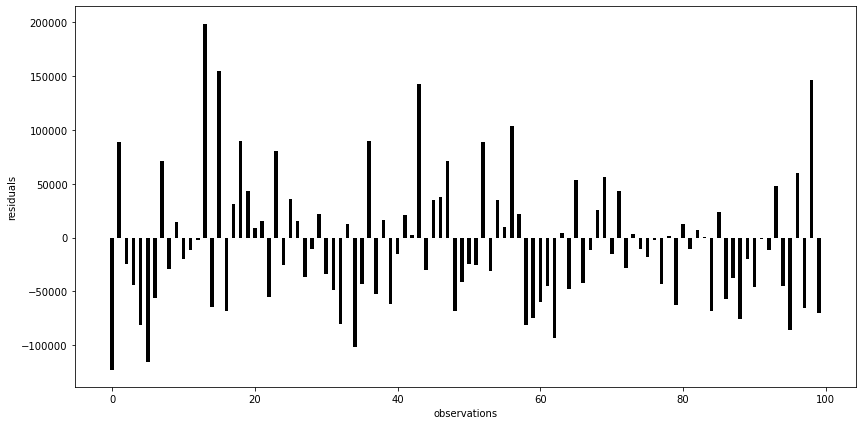

In [34]:
fig1 = plt.figure(figsize=(14,7))
plt.bar("index","error",data=preformance[:100], color="black",width = 0.5 )
plt.xlabel("observations")
plt.ylabel("residuals")
plt.show()

In [35]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
X_train.head()


,const,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
2851,1.0,-118.95,35.38,35.0,2220.0,388.0,906.0,373.0,3.5938,0,1,0,0
16353,1.0,-121.32,38.04,30.0,249.0,44.0,167.0,45.0,4.5000,0,1,0,0
13403,1.0,-117.47,34.12,6.0,10565.0,1767.0,5690.0,1555.0,4.1797,0,1,0,0
1781,1.0,-122.36,37.94,45.0,907.0,188.0,479.0,161.0,3.0862,0,0,1,0
2005,1.0,-119.80,36.74,25.0,1717.0,542.0,1343.0,471.0,0.7990,0,1,0,0


In [36]:
nd_reg = sm.OLS(y_train,X_train).fit()
nd_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     2485.
Date:                Mon, 10 Oct 2022   Prob (F-statistic):               0.00
Time:                        06:26:55   Log-Likelihood:            -2.0532e+05
No. Observations:               16346   AIC:                         4.107e+05
Df Residuals:                   16333   BIC:                         4.108e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.052e+06   1.05e+05    -19.520      0.000   -2.26e+06   -1.85e+06
longitude          -2.645e+04   1139.836    -23.207      0.000   -2.87e+04   -2.42e+04
latitude           -2.527e+04   1123.044    -22.500      0.000   -2.75e+04   -2.31e+04
housing_median_age  1072.7919     49.333     21.746      0.000     976.093    1169.490
total_rooms           -6.9024      0.890     -7.754      0.000      -8.647      -5.158
total_bedrooms        98.4210      7.528     13.074      0.000      83.665     113.177
population           -36.5126      1.174    -31.102      0.000     -38.814     -34.212
households            52.1932      8.080      6.459      0.000      36.355      68.032
median_income       3.947e+04    378.630    104.239      0.000    3.87e+04    4.02e+04
<1H OCEAN          -1.837e+05   3.45e+04     -5.317      0.000   -2.51e+05   -1.16e+05
INLAND             -2.232e+05   3.46e+04     -6.448      0.000   -2.91e+05   -1.55e+05
NEAR BAY           -1.866e+05   3.46e+04     -5.394      0.000   -2.54e+05   -1.19e+05
NEAR OCEAN         -1.779e+05   3.46e+04     -5.146      0.000   -2.46e+05    -1.1e+05
==============================================================================
Omnibus:                     4050.061   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15323.741
Skew:                           1.200   Prob(JB):                         0.00
Kurtosis:                       7.092   Cond. No.                     8.04e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [42]:
housing_predictions = tree_reg.predict(X_test)


C:\Users\EMZ\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- const

  warnings.warn(message, FutureWarning)


ValueError: X has 12 features, but DecisionTreeRegressor is expecting 13 features as input.

In [ ]:
tree_mse = mean_squared_error(X_test, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
#from sklearn import linear_model
#from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Handling Categorical data
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded